In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# preparing final data csv file

In [4]:
cab = pd.read_csv("Cab_Data.csv")
transaction = pd.read_csv("Transaction_ID.csv")
customer = pd.read_csv("Customer_ID.csv")
city = pd.read_csv("City.csv")

In [5]:
cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [6]:
transaction.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [7]:
customer.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [8]:
city.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [9]:
city.count()

City          20
Population    20
Users         20
dtype: int64

In [10]:
transaction.Payment_Mode.value_counts()

Card    263991
Cash    176107
Name: Payment_Mode, dtype: int64

In [11]:
cab.Company.value_counts()

Yellow Cab    274681
Pink Cab       84711
Name: Company, dtype: int64

In [12]:
result = pd.merge(left = transaction,right = customer,how="inner")
result = pd.merge(left = result,right = cab,how="inner")
result = pd.merge(left = result,right = city,how="inner")
result.head()

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users
0,10000011,29290,Card,Male,28,10813,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,"814,885","24,701"
1,10351127,29290,Cash,Male,28,10813,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,"814,885","24,701"
2,10412921,29290,Card,Male,28,10813,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,"814,885","24,701"
3,10000012,27703,Card,Male,27,9237,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,"814,885","24,701"
4,10320494,27703,Card,Male,27,9237,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,"814,885","24,701"


In [13]:
save = "final_data.csv"
result.to_csv(save,index = False)

In [13]:
final = pd.read_csv("final_data.csv")

In [23]:
final = final.drop('Payment_Mode',axis =1)

KeyError: "['Payment_Mode'] not found in axis"

In [24]:
final.isnull().sum()

Transaction ID        0
Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Population            0
Users                 0
dtype: int64

In [25]:
final

,Transaction ID,Customer ID,Gender,Age,Income (USD/Month),Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users
0,10000011,29290,Male,28,10813,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,"814,885","24,701"
1,10351127,29290,Male,28,10813,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,"814,885","24,701"
2,10412921,29290,Male,28,10813,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,"814,885","24,701"
3,10000012,27703,Male,27,9237,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,"814,885","24,701"
4,10320494,27703,Male,27,9237,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,"814,885","24,701"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10307228,51406,Female,29,6829,43162,Yellow Cab,WASHINGTON DC,38.40,668.93,525.3120,"418,859","127,001"
359388,10319775,51406,Female,29,6829,43203,Yellow Cab,WASHINGTON DC,3.57,67.60,44.5536,"418,859","127,001"
359389,10347676,51406,Female,29,6829,43287,Yellow Cab,WASHINGTON DC,23.46,331.97,337.8240,"418,859","127,001"
359390,10358624,51406,Female,29,6829,43314,Yellow Cab,WASHINGTON DC,27.60,358.23,364.3200,"418,859","127,001"


In [26]:
final.duplicated().sum()

0

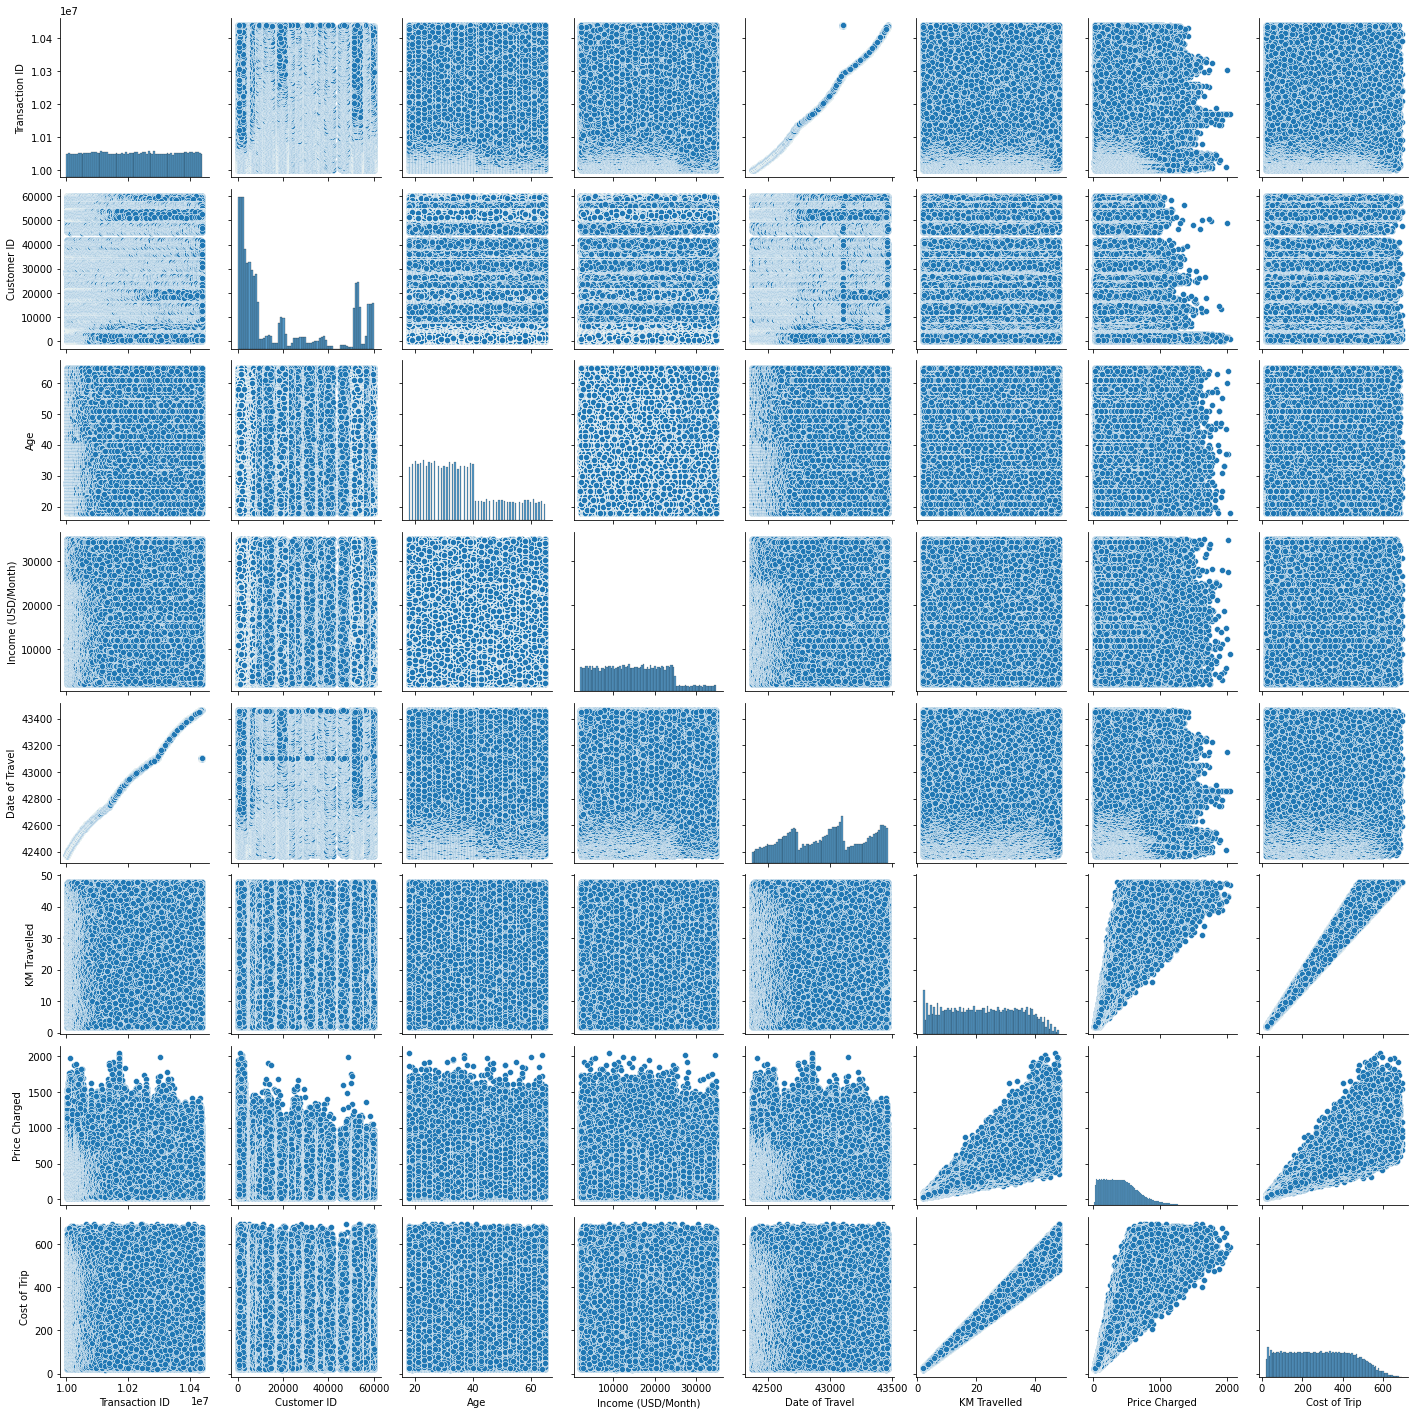

In [27]:
sns.pairplot(data = final)

In [28]:
import xlrd
import datetime
def convert_date(xl_date):
    datetime_date = xlrd.xldate_as_datetime(xl_date, 0)
    date_object = datetime_date.date()
    formatted_date = datetime.date.strftime(date_object,"%m/%d/%Y")
    return formatted_date

In [29]:
final['Date of Travel'] = final['Date of Travel'].apply(convert_date)

In [30]:
final

,Transaction ID,Customer ID,Gender,Age,Income (USD/Month),Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users
0,10000011,29290,Male,28,10813,01/08/2016,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,"814,885","24,701"
1,10351127,29290,Male,28,10813,07/21/2018,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,"814,885","24,701"
2,10412921,29290,Male,28,10813,11/23/2018,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,"814,885","24,701"
3,10000012,27703,Male,27,9237,01/06/2016,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,"814,885","24,701"
4,10320494,27703,Male,27,9237,04/21/2018,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,"814,885","24,701"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10307228,51406,Female,29,6829,03/03/2018,Yellow Cab,WASHINGTON DC,38.40,668.93,525.3120,"418,859","127,001"
359388,10319775,51406,Female,29,6829,04/13/2018,Yellow Cab,WASHINGTON DC,3.57,67.60,44.5536,"418,859","127,001"
359389,10347676,51406,Female,29,6829,07/06/2018,Yellow Cab,WASHINGTON DC,23.46,331.97,337.8240,"418,859","127,001"
359390,10358624,51406,Female,29,6829,08/02/2018,Yellow Cab,WASHINGTON DC,27.60,358.23,364.3200,"418,859","127,001"


In [31]:
final["profit"] = final.apply(lambda x:x["Price Charged"] - x["Cost of Trip"],axis=1)


In [32]:
final["year"] = final["Date of Travel"].apply(lambda x:x[-4:])

In [33]:
final.dtypes

Transaction ID          int64
Customer ID             int64
Gender                 object
Age                     int64
Income (USD/Month)      int64
Date of Travel         object
Company                object
City                   object
KM Travelled          float64
Price Charged         float64
Cost of Trip          float64
Population             object
Users                  object
profit                float64
year                   object
dtype: object

In [34]:
final.year.value_counts()

2017    128510
2018    123563
2016    107319
Name: year, dtype: int64

# profit analysis
is there any difference in profit for yellow and pink cab?

In [48]:
positive = final[final["profit"] > 0]
gb = positive.groupby(["Company","year"])
r= gb.apply(lambda x: x["profit"].sum() / x["KM Travelled"].sum()).reset_index(name = 'average profit per km')

Text(0.5, 1.0, 'yearly average profit per km  for pink and yellow cab')

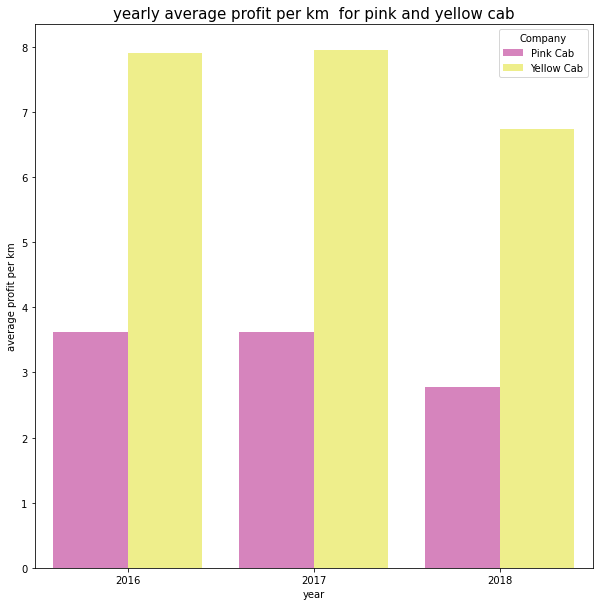

In [49]:
plt.figure(figsize = (10,10))
sns.barplot(data = r,x = "year",y = "average profit per km",hue ="Company",palette=['tab:pink', 'xkcd:light yellow'])
plt.title("yearly average profit per km  for pink and yellow cab",fontsize = 15)

In [50]:
gb = positive.groupby(["Company"])
r= gb["profit"].sum().reset_index(name = "total profit")

In [51]:
r

,Company,total profit
0,Pink Cab,5534000.530
1,Yellow Cab,44279471.690


Text(0.5, 1.0, 'total profit for pink and yellow cab')

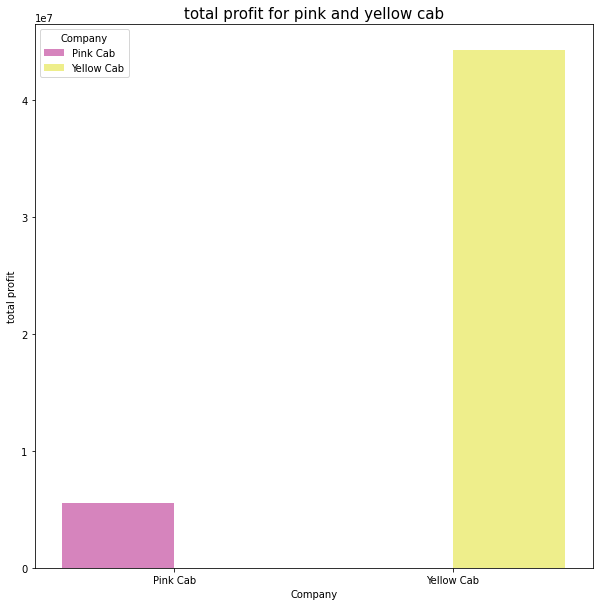

In [52]:
plt.figure(figsize = (10,10))
sns.barplot(data = r,x = "Company",y = "total profit",hue ="Company",palette=['tab:pink', 'xkcd:light yellow'])
plt.title("total profit for pink and yellow cab",fontsize = 15)

# seasonality
would pink cab outperfrom yellow cab in a season?

In [54]:
def season(d):
    month = int(d[:2])
    if 9 <= month <= 11:
        return "fall"
    if month in [12,1,2]:
        return "winter"
    if 3 <= month <= 5:
        return "spring"
    if 6 <= month <= 8:
        return "summer"
    

In [55]:
final["season"] = final["Date of Travel"].apply(lambda x:season(x))

In [56]:
final["season"]

0         winter
1         summer
2           fall
3         winter
4         spring
           ...  
359387    spring
359388    spring
359389    summer
359390    summer
359391    summer
Name: season, Length: 359392, dtype: object

In [57]:
pie = final.season.value_counts(normalize =True).rename_axis("season").reset_index(name = "percent")
pie

,season,percent
0,fall,0.335
1,winter,0.246
2,summer,0.233
3,spring,0.186


In [58]:
data = pie["percent"].tolist()
key = pie["season"].tolist()

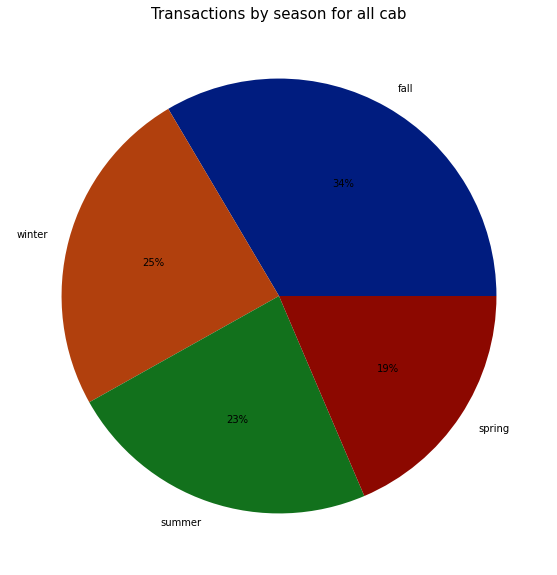

In [59]:
plt.figure(figsize = (10,10))
palette_color = sns.color_palette('dark')
plt.pie(data, labels=key, colors=palette_color, autopct='%1.0f%%')
plt.title("Transactions by season for all cab",fontsize = 15)
plt.show()

In [61]:
positive = final[final["profit"] > 0]
gb = positive.groupby(["season","Company"])
r= gb.apply(lambda x: x["profit"].sum() / x["KM Travelled"].sum()).reset_index(name = "average profit per km")

In [62]:
r

,season,Company,average profit per km
0,fall,Pink Cab,3.363
1,fall,Yellow Cab,6.837
2,spring,Pink Cab,3.030
3,spring,Yellow Cab,8.735
4,summer,Pink Cab,2.607
5,summer,Yellow Cab,7.138
6,winter,Pink Cab,4.119
7,winter,Yellow Cab,7.772


Text(0.5, 1.0, 'average profit per km by season for pink and yellow cab')

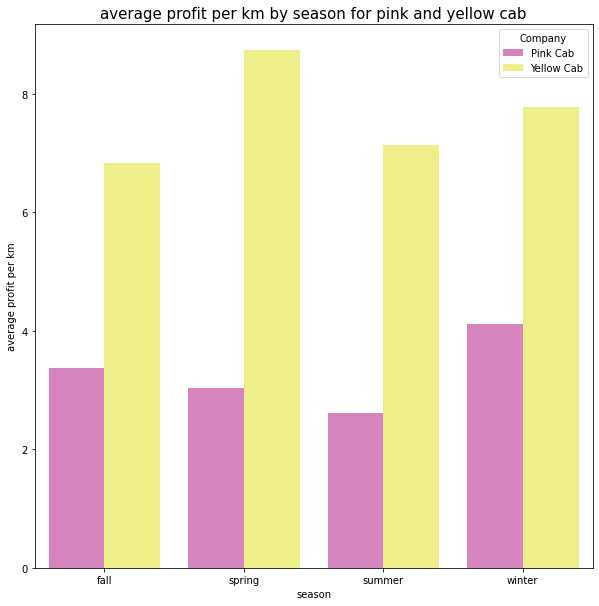

In [63]:
plt.figure(figsize=(10,10))
sns.barplot(data = r,x = "season",y = "average profit per km",hue = "Company",palette=['tab:pink', 'xkcd:light yellow'])
plt.title("average profit per km by season for pink and yellow cab",fontsize = 15)

# Distribution
what is the shape of the distribution for yellow and pink cab

Text(0.5, 1.0, 'distribution for pink and yellow cab')

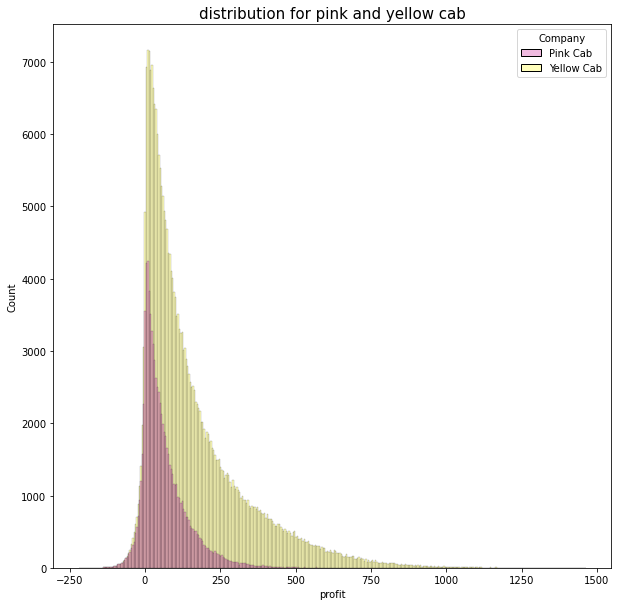

In [83]:
plt.figure(figsize=(10,10))
sns.histplot(data = final,x = "profit",hue = "Company",palette=['tab:pink', 'xkcd:light yellow'])
plt.title("distribution for pink and yellow cab",fontsize = 15)

# loss
would yellow cab losses be significantly larger than pink cab?

In [35]:
final.columns

Index(['Transaction ID', 'Customer ID', 'Gender', 'Age', 'Income (USD/Month)',
       'Date of Travel', 'Company', 'City', 'KM Travelled', 'Price Charged',
       'Cost of Trip', 'Population', 'Users', 'profit', 'year'],
      dtype='object')

In [40]:
negative = final[final["profit"] < 0]
negative

,Transaction ID,Customer ID,Gender,Age,Income (USD/Month),Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,profit,year
39,10031719,28533,Male,39,28386,05/13/2016,Pink Cab,ATLANTA GA,4.280,40.490,51.360,"814,885","24,701",-10.870,2016
42,10347704,29039,Male,35,17761,07/12/2018,Pink Cab,ATLANTA GA,2.360,24.830,25.016,"814,885","24,701",-0.186,2018
45,10266097,28102,Male,39,14181,11/26/2017,Pink Cab,ATLANTA GA,25.520,283.260,293.480,"814,885","24,701",-10.220,2017
47,10319969,29494,Male,28,5644,04/17/2018,Pink Cab,ATLANTA GA,11.100,108.440,120.990,"814,885","24,701",-12.550,2018
59,10136342,29599,Male,27,12948,01/10/2017,Pink Cab,ATLANTA GA,5.700,46.790,61.560,"814,885","24,701",-14.770,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359299,10407212,51880,Female,59,22853,11/12/2018,Yellow Cab,WASHINGTON DC,6.900,92.670,92.736,"418,859","127,001",-0.066,2018
359310,10218074,52158,Female,59,19249,09/02/2017,Yellow Cab,WASHINGTON DC,5.500,68.350,70.620,"418,859","127,001",-2.270,2017
359354,10395329,51257,Male,39,15247,10/21/2018,Yellow Cab,WASHINGTON DC,38.610,537.940,542.084,"418,859","127,001",-4.144,2018
359389,10347676,51406,Female,29,6829,07/06/2018,Yellow Cab,WASHINGTON DC,23.460,331.970,337.824,"418,859","127,001",-5.854,2018


In [43]:
gb = negative.groupby(["Company"])
r= gb["profit"].sum().reset_index(name = "total loss in profit")

In [44]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
r

,Company,total loss in profit
0,Pink Cab,-226672.209
1,Yellow Cab,-259098.519


Text(0.5, 1.0, 'distribution for pink and yellow cab')

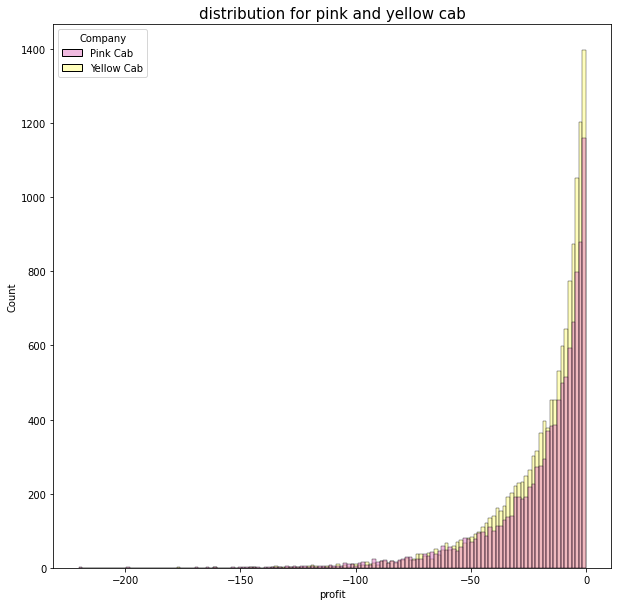

In [45]:
plt.figure(figsize=(10,10))
sns.histplot(data = negative,x = "profit",hue = "Company",palette=['tab:pink', 'xkcd:light yellow'])
plt.title("distribution for pink and yellow cab",fontsize = 15)

# Yellow Cab seems to be a better investment than pink cab

- Profits- yellow cab outperformed yellow cab in total and yearly profit. Same result with average profits per km travelled.
- seasonality- yellow cab once again outperform with higher average profits per km in all seasons
- Distribution- while both cabs profits are positively skewed, yellow cab has an higher average profit and longer right tail meaning yellow cab highest profits are larger than pink cab top profits.
- loss - both cabs losses  are around the same.